In [14]:
import scanpy as sc
import scrnatools as rna
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import math

# Data paths

## demeter

In [2]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

## gardner-lab-computer

In [3]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

In [4]:
adata = sc.read(f"{processedDataPath}/human_ILC2/h5ad_files/human_merged_ILC_subset_3000_HVG.h5ad")

In [11]:
adata

AnnData object with n_obs × n_vars = 5952 × 3247
    obs: 'batch_key', 'donor', 'compartment', 'scrublet_score', 'scrublet_called_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'MS/LP_log_density_ratio'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'include_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_key_colors', 'compartment_colors', 'donor_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'log1p', 'neighbors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap'
    layers: 'raw_counts', 'scVI_normalized'
    obsp: 'connectivities', 'distances'

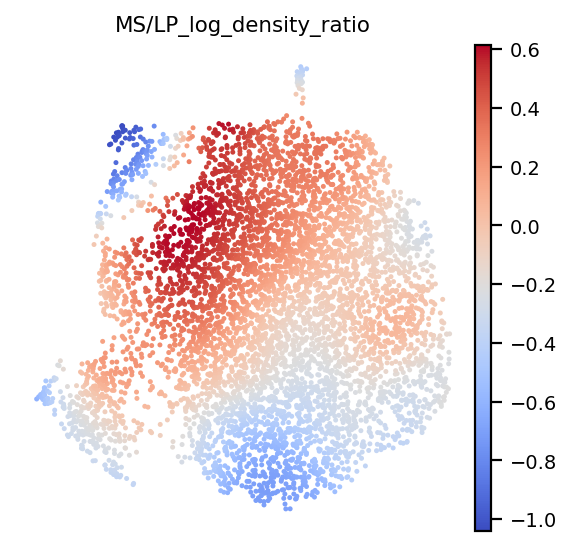

In [13]:
sc.pl.umap(
    adata,
    color="MS/LP_log_density_ratio",
    cmap="coolwarm"
)

In [6]:
geneList = ["GATA3", "AREG", "KLRG1", "PPARG", "PTPRC", "IL7R", "MAF", "RORA", "ZEB2", "TLE4", "BCL11B", "FCER1G", "RORC", "CD3E", "KIT"]
geneList = [i for i in geneList if i in adata.var_names]

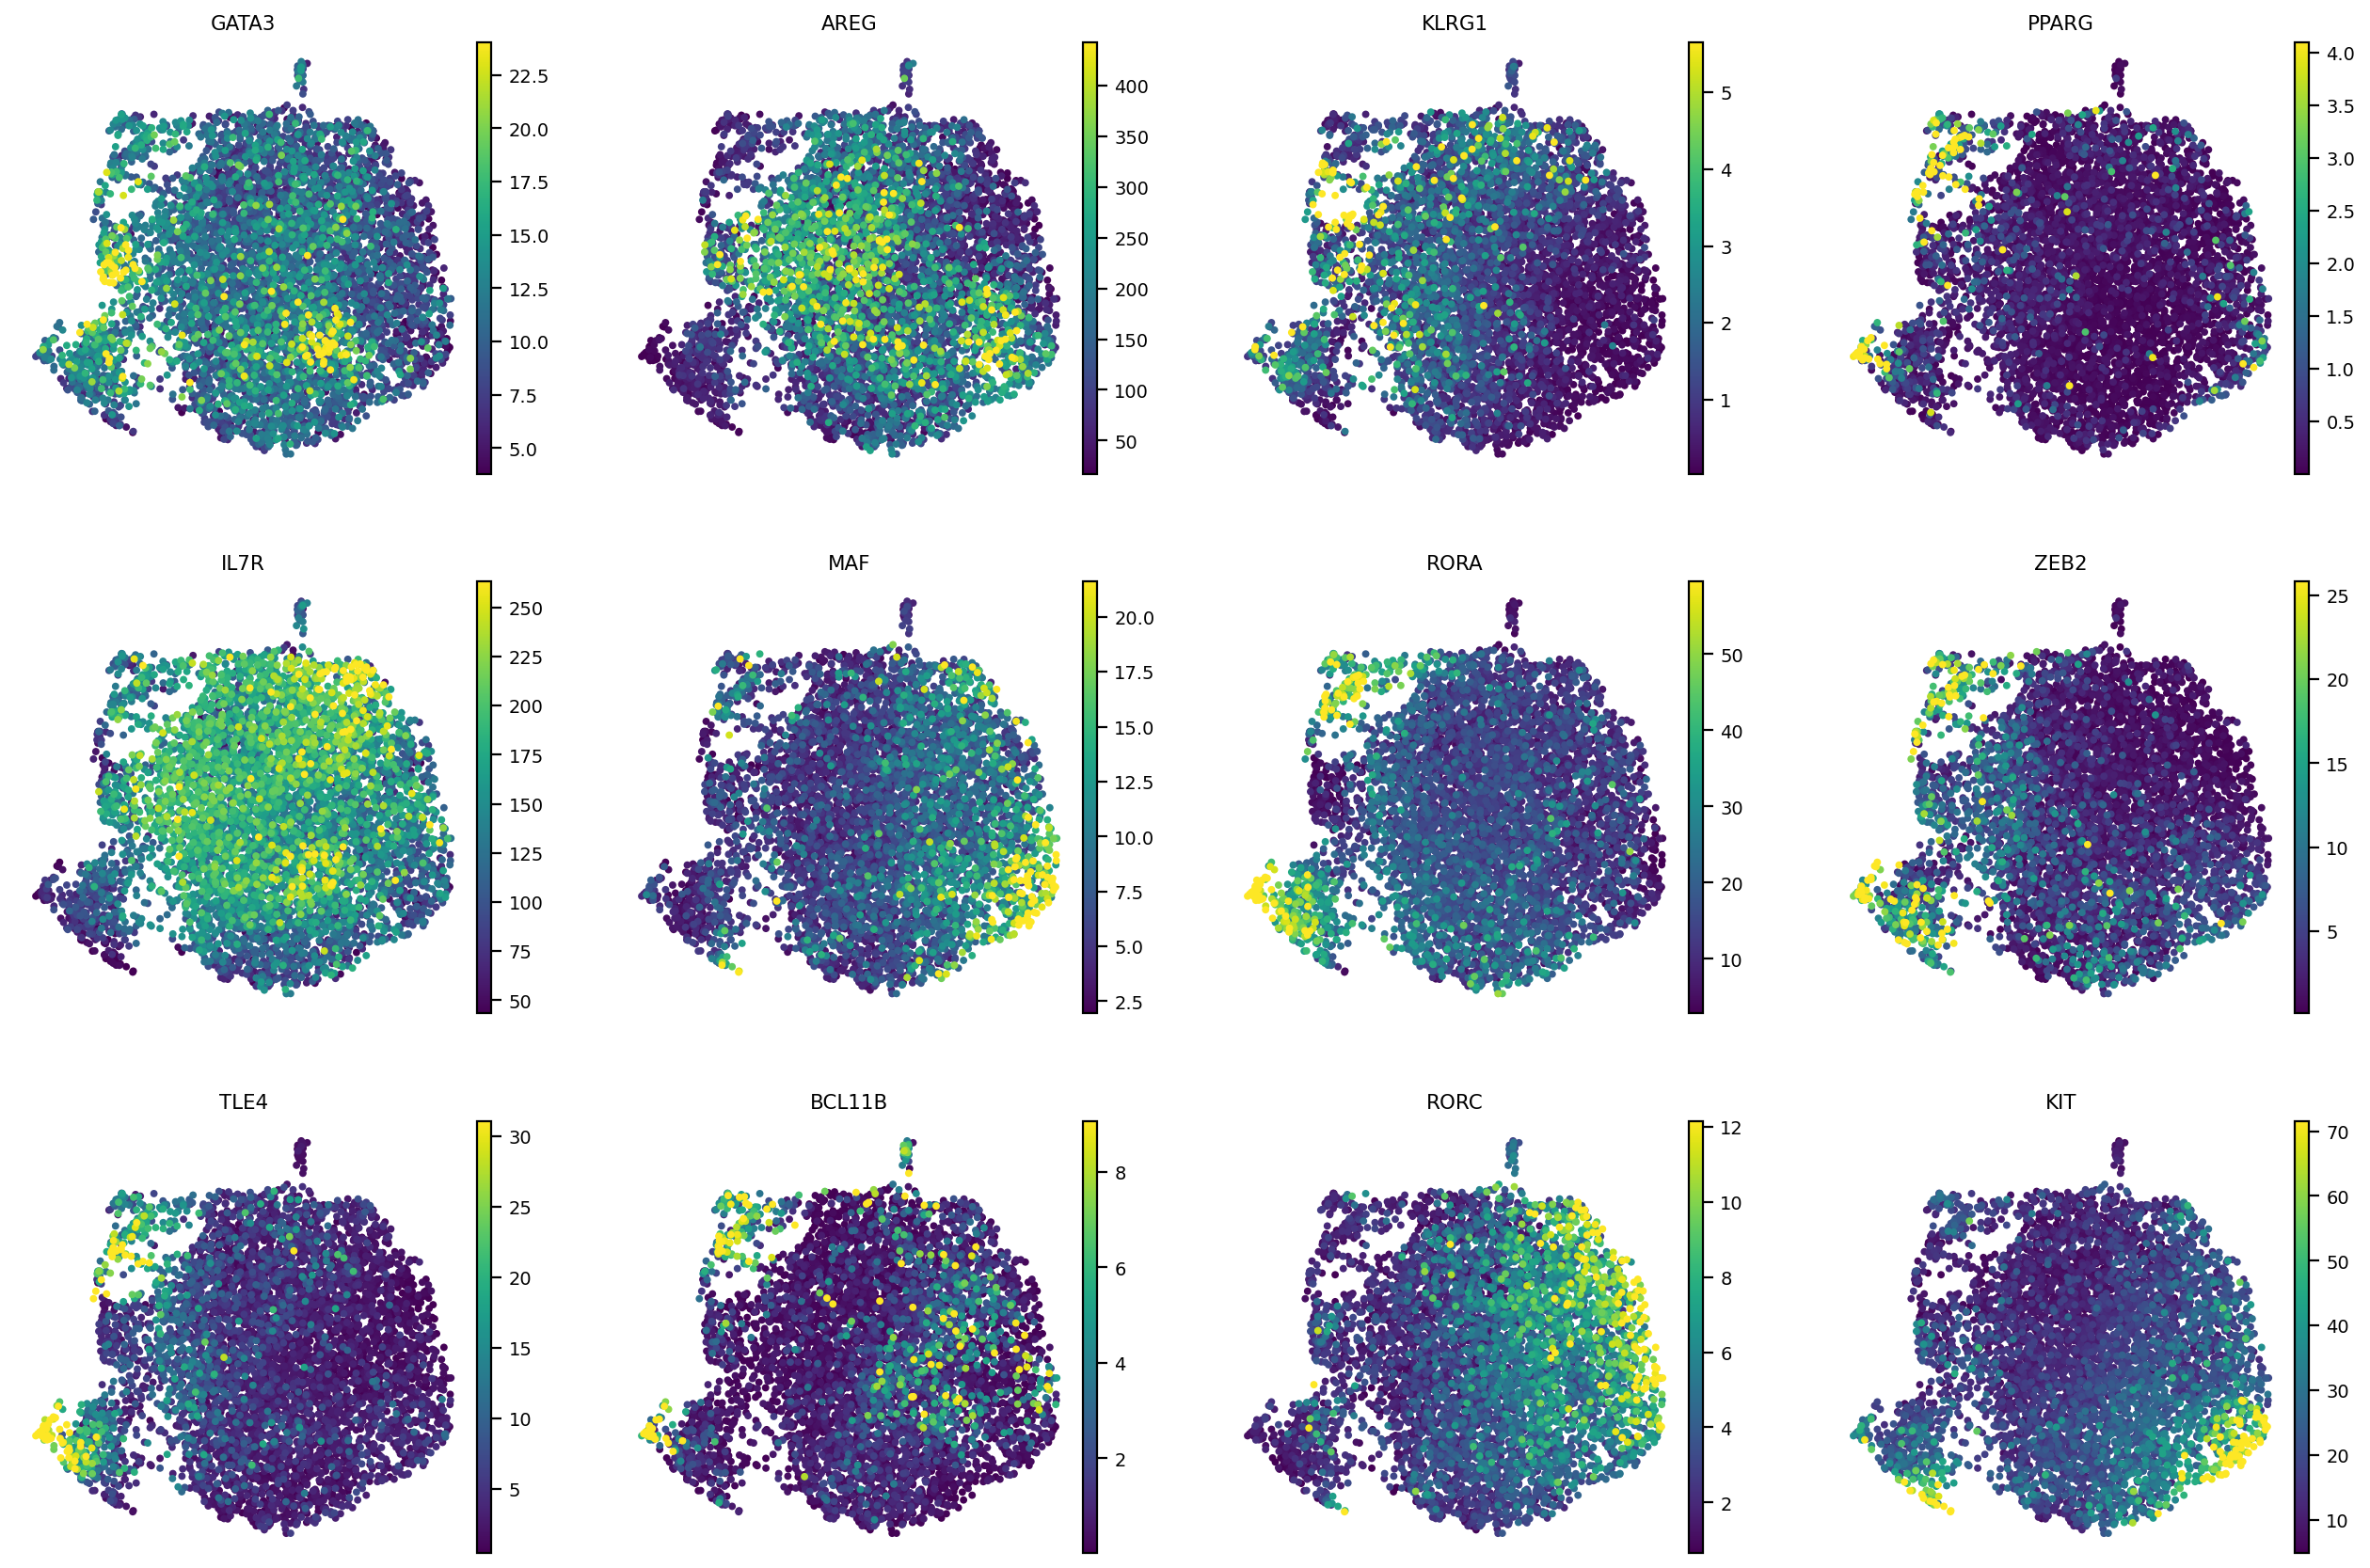

In [54]:
sc.settings.figdir = "../analysis"
rna.pl.gene_embedding(
    adata,
    geneList,
    layer="scVI_normalized",
    s=50,
    save="_feature_plots.pdf"
)

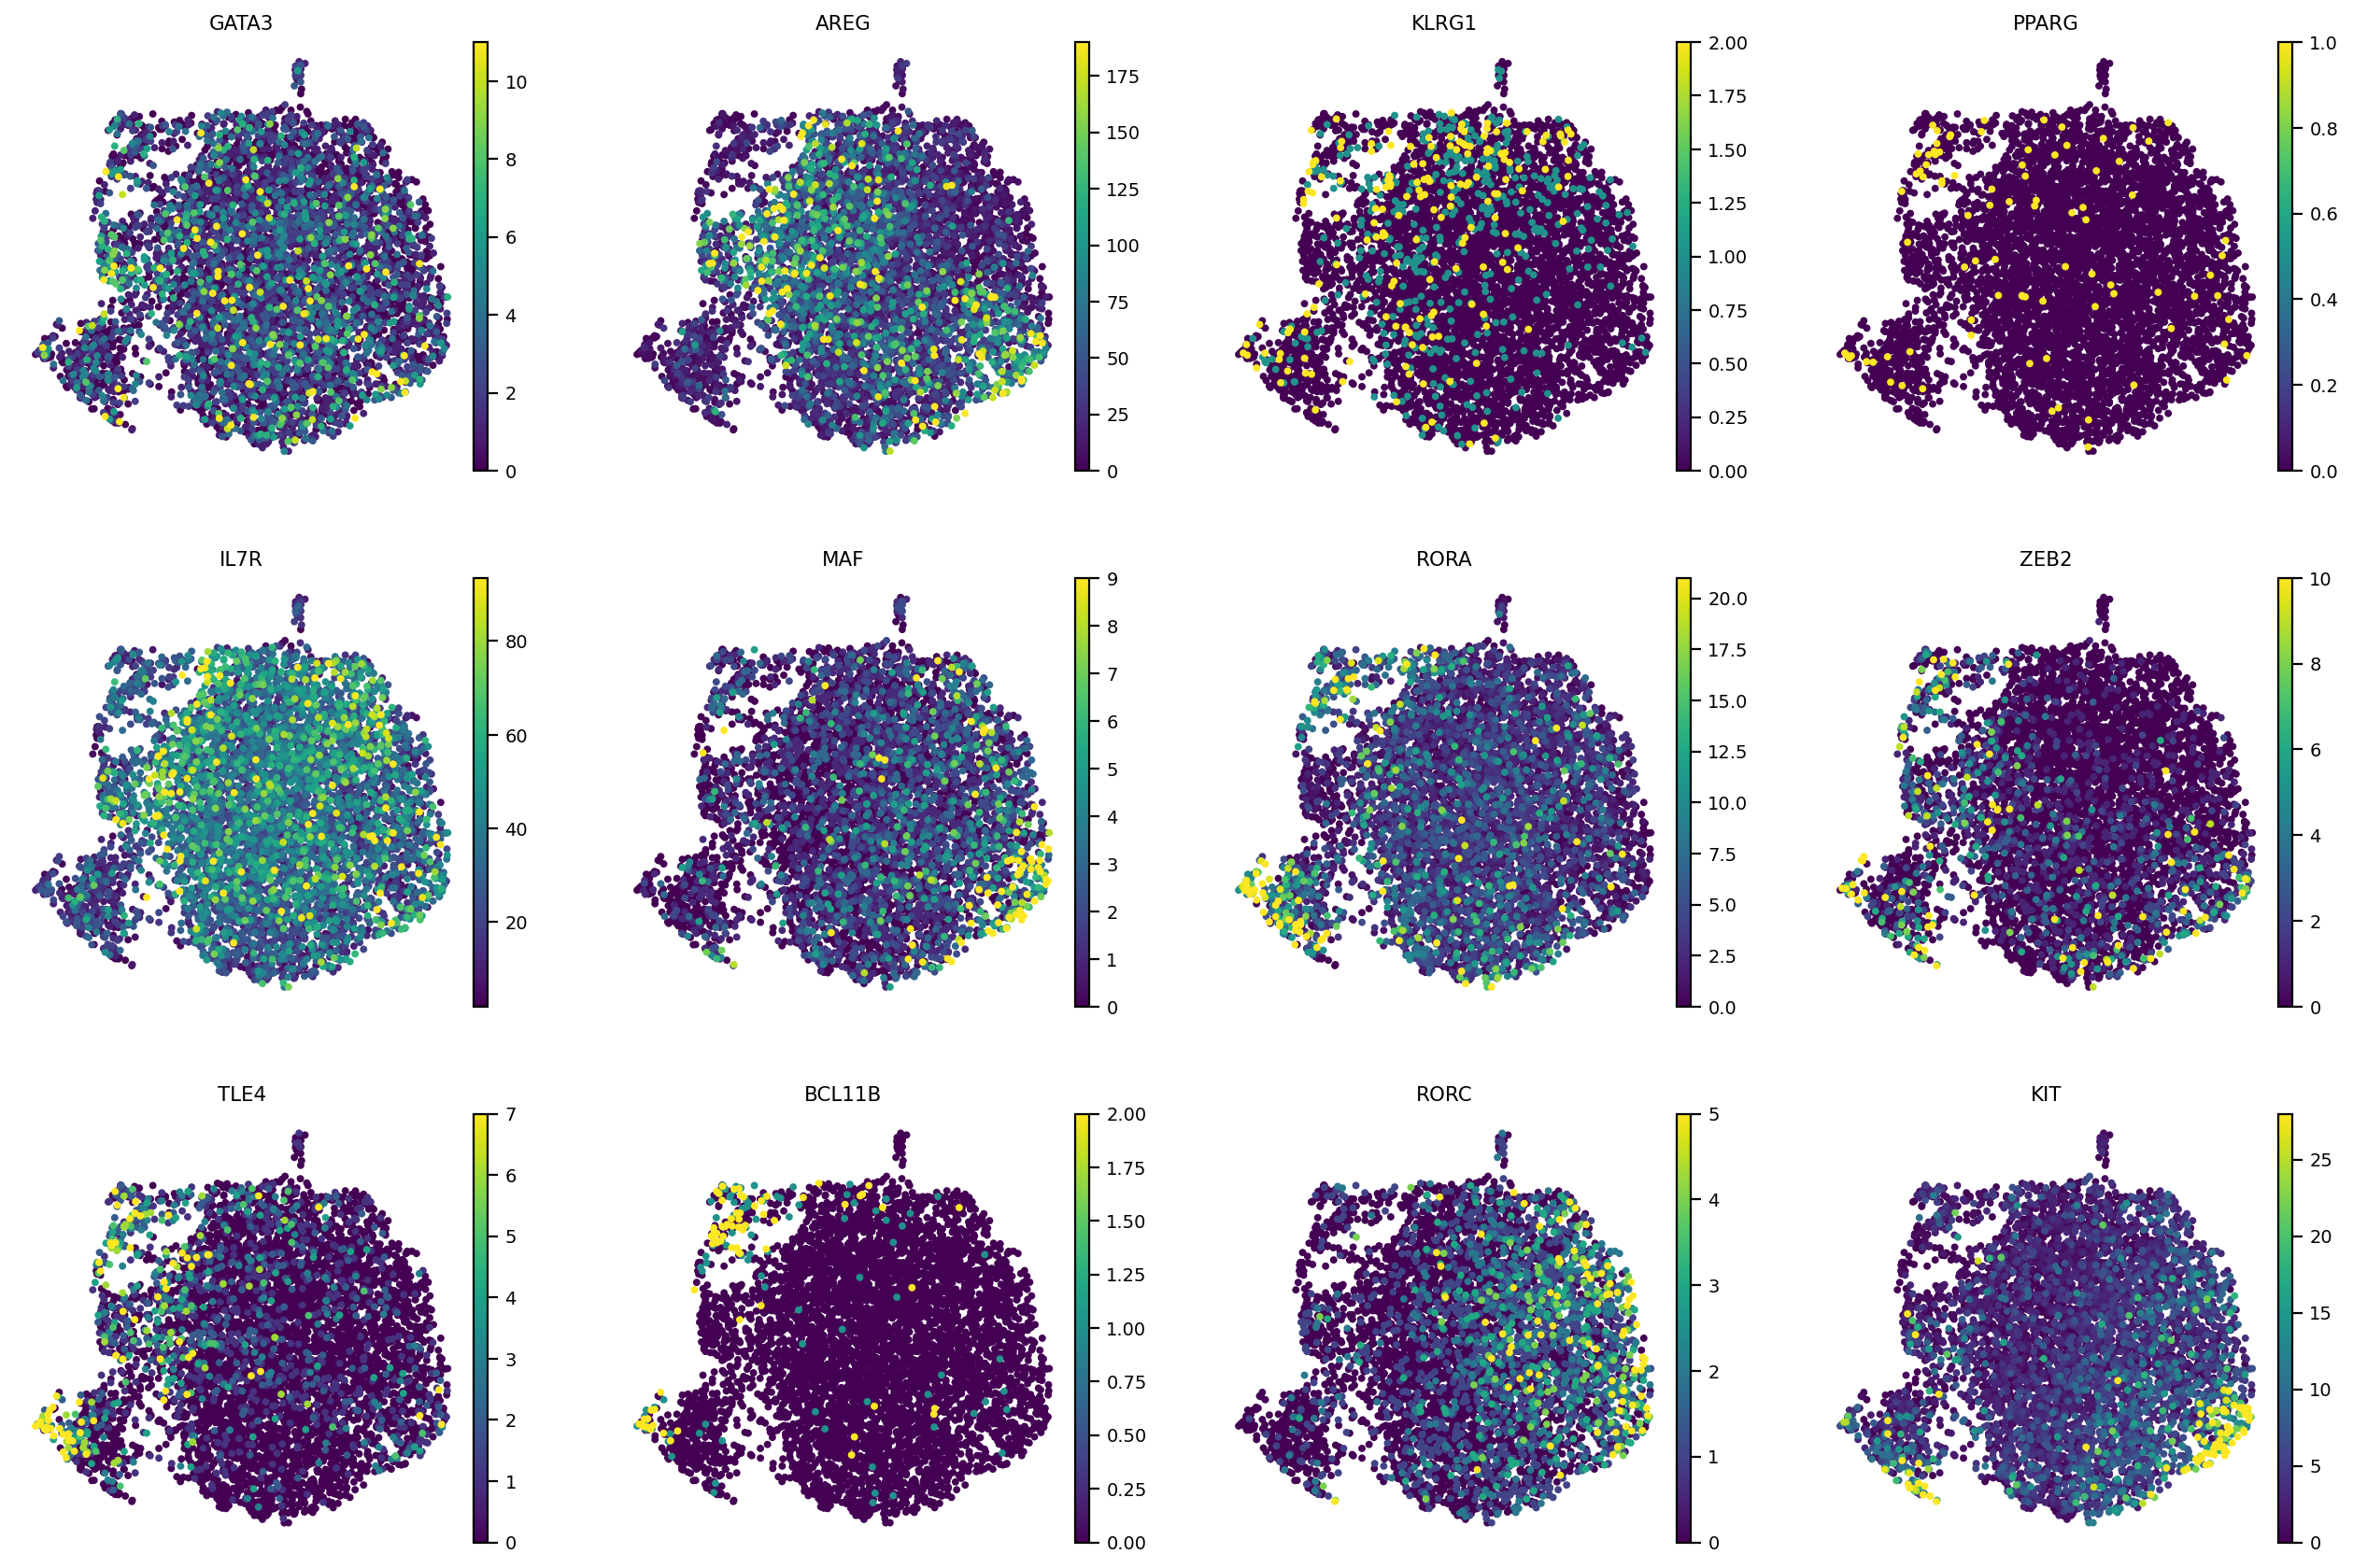

In [53]:
rna.pl.gene_embedding(
    adata,
    geneList,
    layer="raw_counts",
    s=50
)

In [7]:
plotData = pd.DataFrame(adata[:, geneList].layers["scVI_normalized"], index=adata.obs.index, columns=adata[:, geneList].var_names)

In [8]:
plotData["MS_LP_log_density"] = adata.obs["MS/LP_log_density_ratio"]

SignificanceResult(statistic=-0.026139032978387693, pvalue=0.04374493876451319)
SignificanceResult(statistic=0.21571600428271567, pvalue=1.297542915513778e-63)
SignificanceResult(statistic=0.35479002933625786, pvalue=4.406012070132252e-176)
SignificanceResult(statistic=0.14101186523798798, pvalue=8.16443648999428e-28)
SignificanceResult(statistic=0.4022964467489426, pvalue=2.0119260108749966e-230)
SignificanceResult(statistic=-0.24035652044671352, pvalue=5.594509477855797e-79)
SignificanceResult(statistic=-0.18538175789304673, pvalue=3.642273982382379e-47)
SignificanceResult(statistic=-0.13895390686776793, pvalue=4.758786984518267e-27)
SignificanceResult(statistic=0.1480646021900765, pvalue=1.5873092220165758e-30)
SignificanceResult(statistic=-0.2707115084913948, pvalue=1.7642135378048077e-100)
SignificanceResult(statistic=-0.14751675360423122, pvalue=2.607007040874584e-30)
SignificanceResult(statistic=-0.5687025636363685, pvalue=0.0)


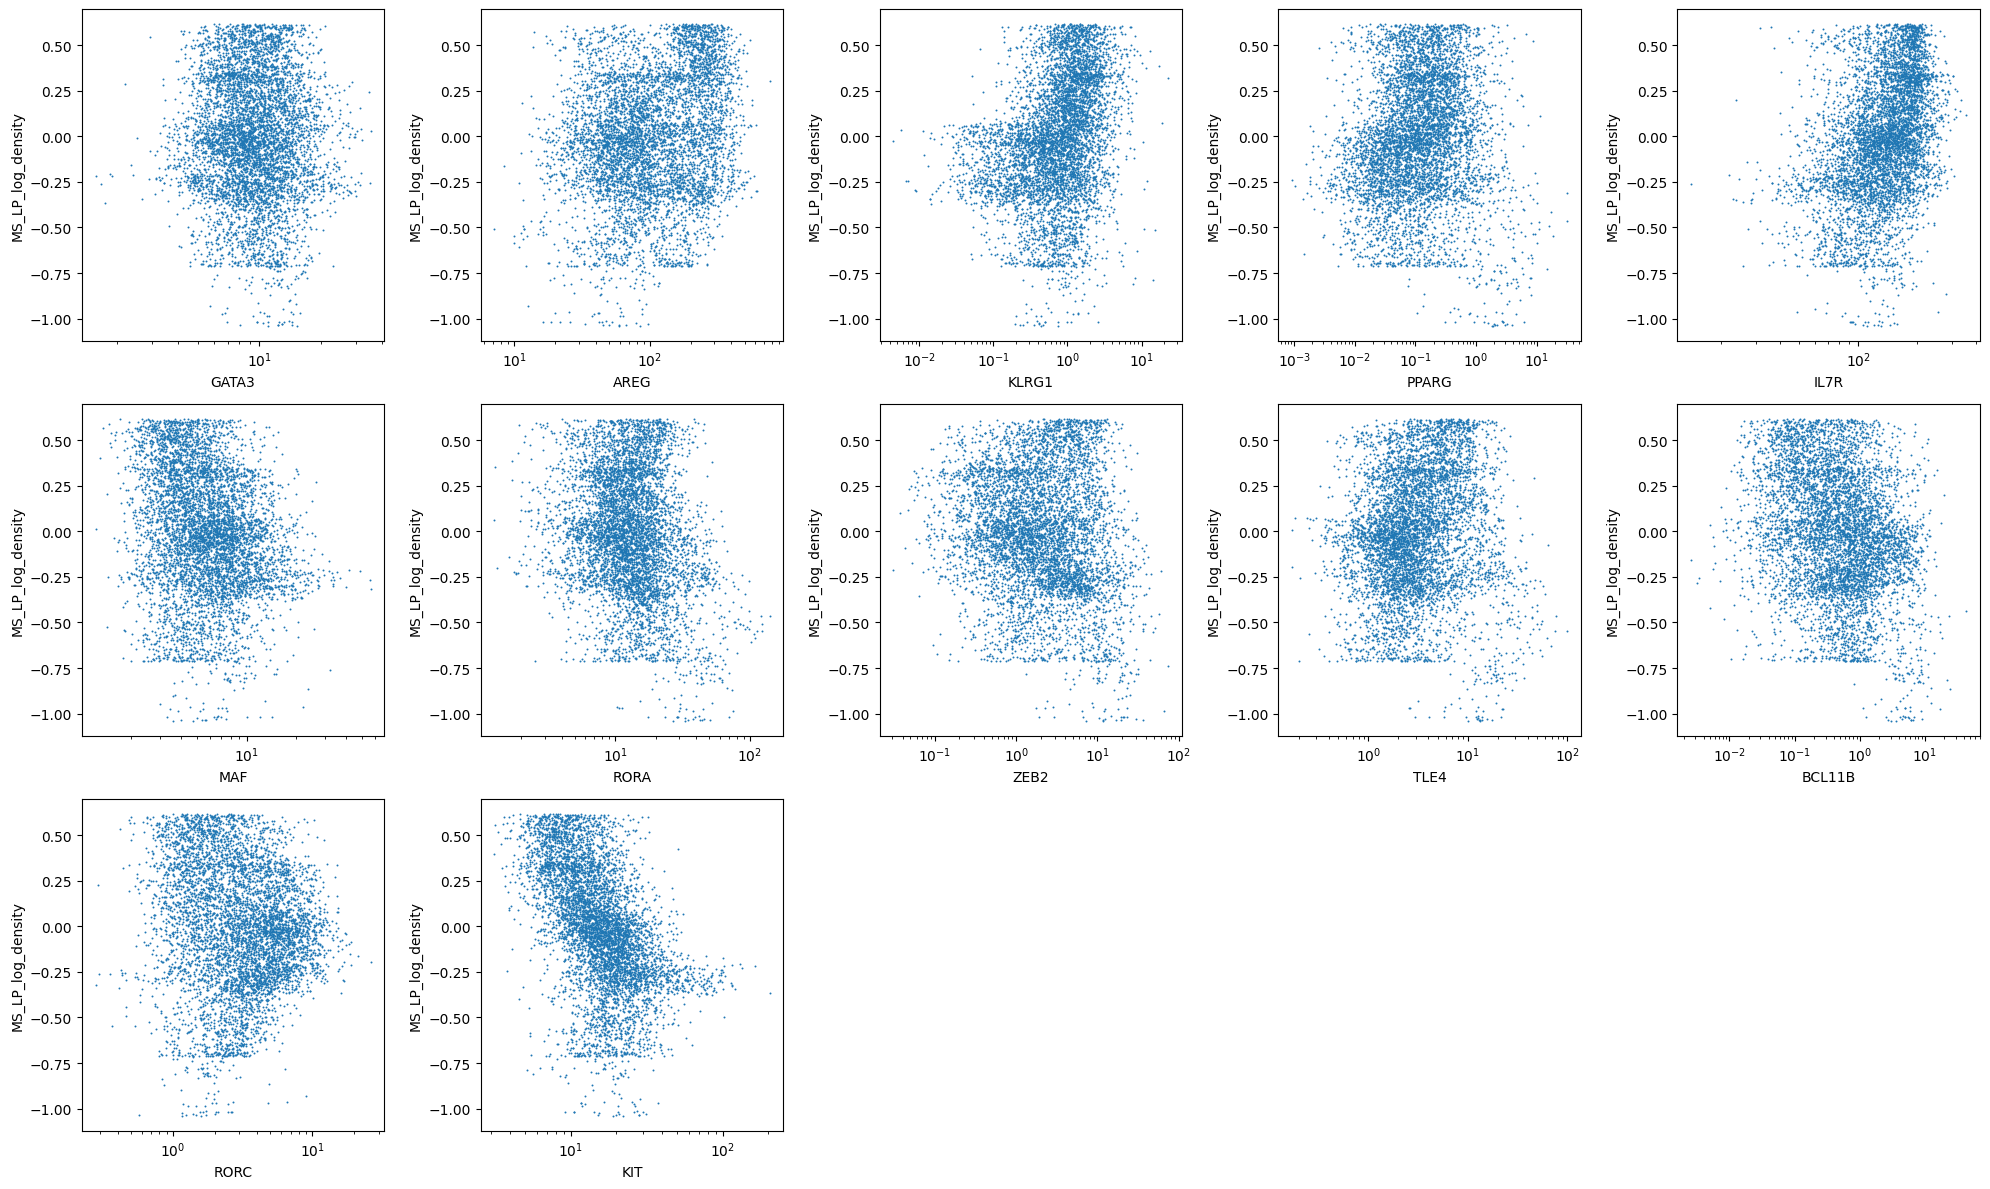

In [25]:
ncols = 5
nrows = math.ceil(len(geneList)/ncols)
fig = plt.figure(figsize=(ncols*4, nrows*4))
for i,gene in enumerate(geneList):
    plt.subplot(nrows, ncols, i+1)
    ax = sns.scatterplot(
        plotData,
        x=gene,
        y="MS_LP_log_density",
        s=2,
        linewidth=0
    )
    ax.set_xscale("log")
    print(spearmanr(np.log10(plotData[gene]), plotData.MS_LP_log_density))
fig.tight_layout()
plt.savefig("../analysis/gene_log_density_correlation.pdf", dpi=300)
plt.show()

In [61]:
plotData = plotData.melt()

In [63]:
plotData["compartment"] = list(adata.obs.compartment)*len(geneList)

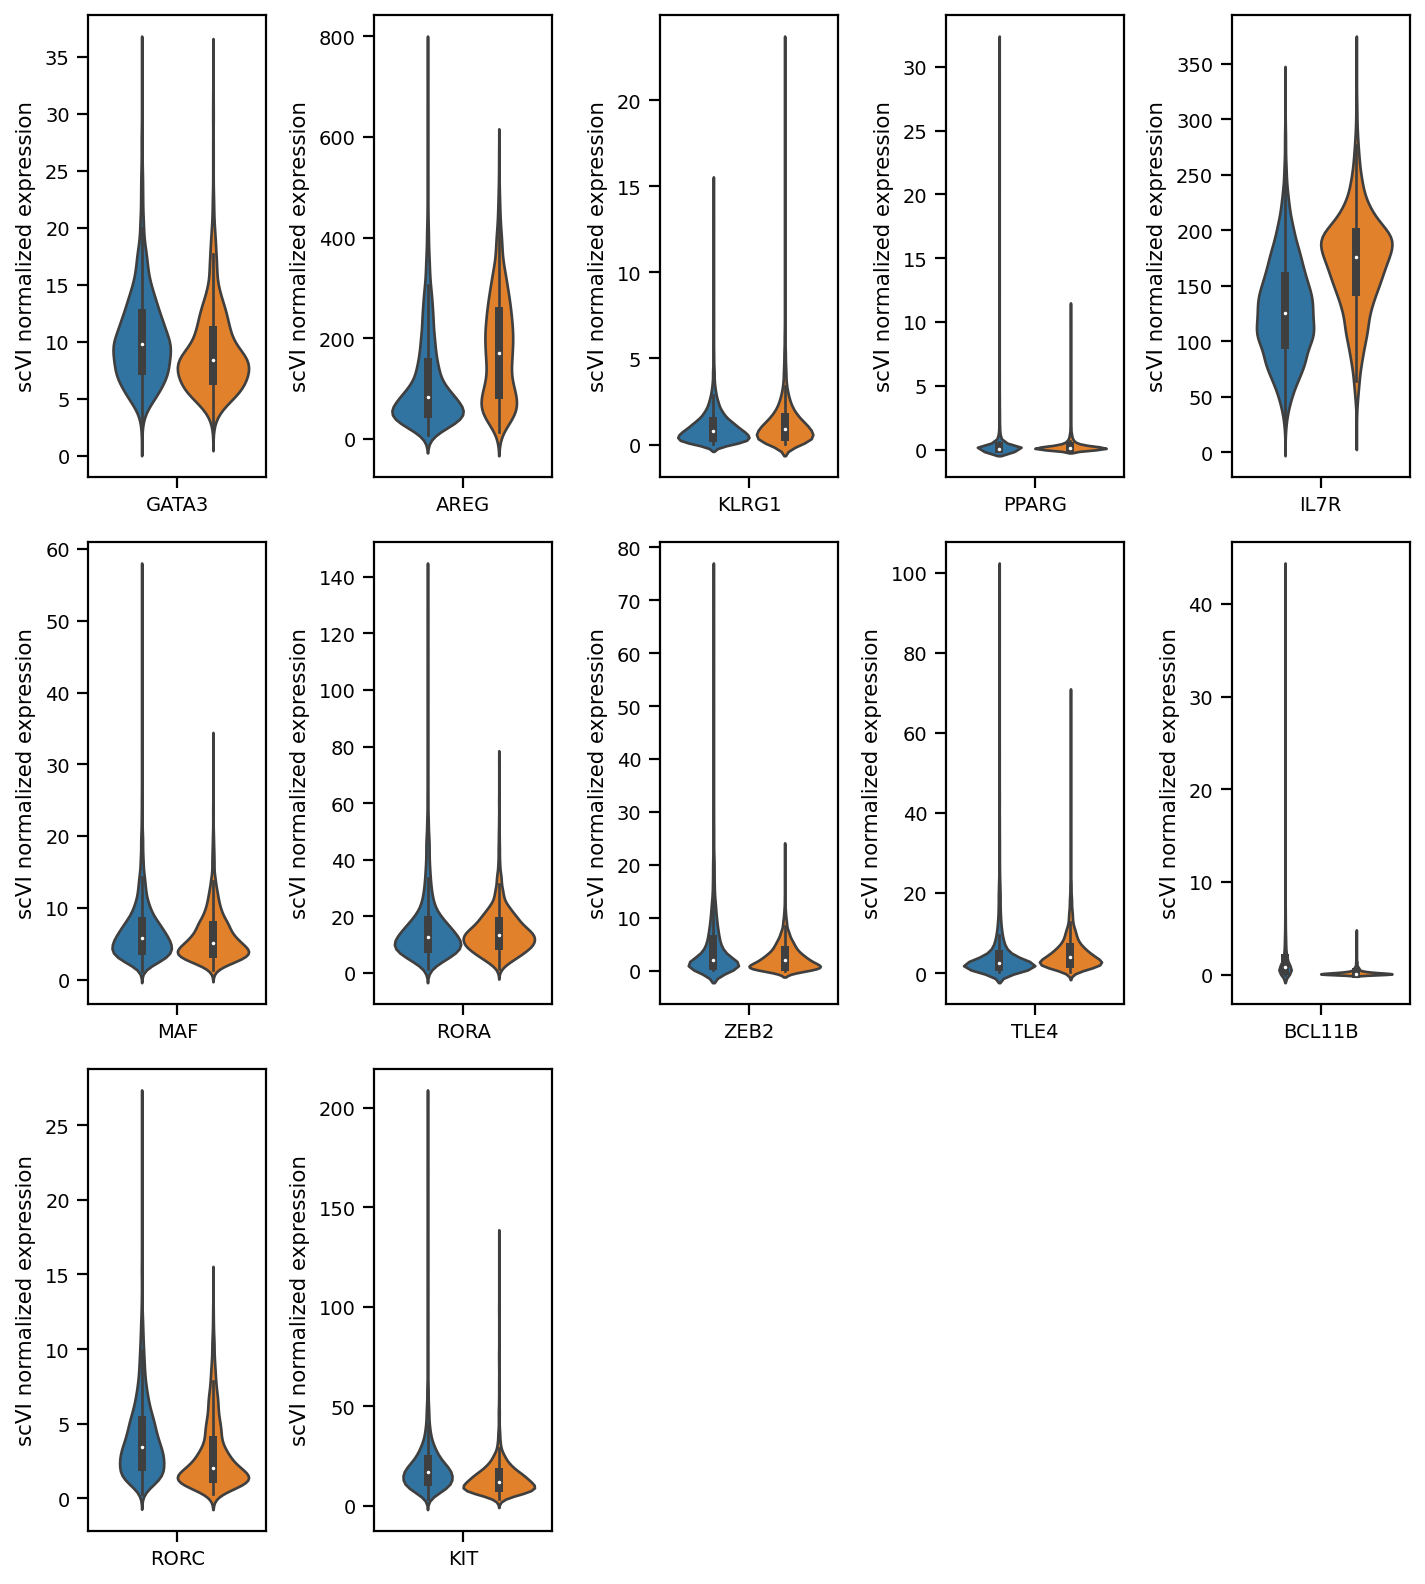

In [73]:
ncols = 5
nrows = math.ceil(len(geneList)/ncols)
fig = plt.figure(figsize=(nrows*3, ncols*2))

for i,gene in enumerate(geneList):
    plt.subplot(nrows, ncols, i+1)
    ax = sns.violinplot(
        plotData[plotData.variable == gene],
        x="variable",
        y="value",
        hue="compartment"
    )
    ax.set_ylabel("scVI normalized expression")
    ax.set_xlabel("")
    ax.get_legend().remove()
fig.tight_layout()
plt.savefig("../analysis/feature_plots_violin.pdf", dpi=300)
plt.show()

In [74]:
fullAdata = sc.read(f"{processedDataPath}human_ILC2/h5ad_files/human_merged_5000_HVG.h5ad")

In [82]:
geneList = ["GATA3", "CD127", "CD161", "CRTH-2", "ST2", "AREG", "KLRG1", "PPARG", "PTPRC", "IL7R", "MAF", "RORA", "ZEB2", "TLE4", "BCL11B", "FCER1G", "RORC", "CD3E", "KIT"]
geneList = [i for i in geneList if i in fullAdata.var_names]

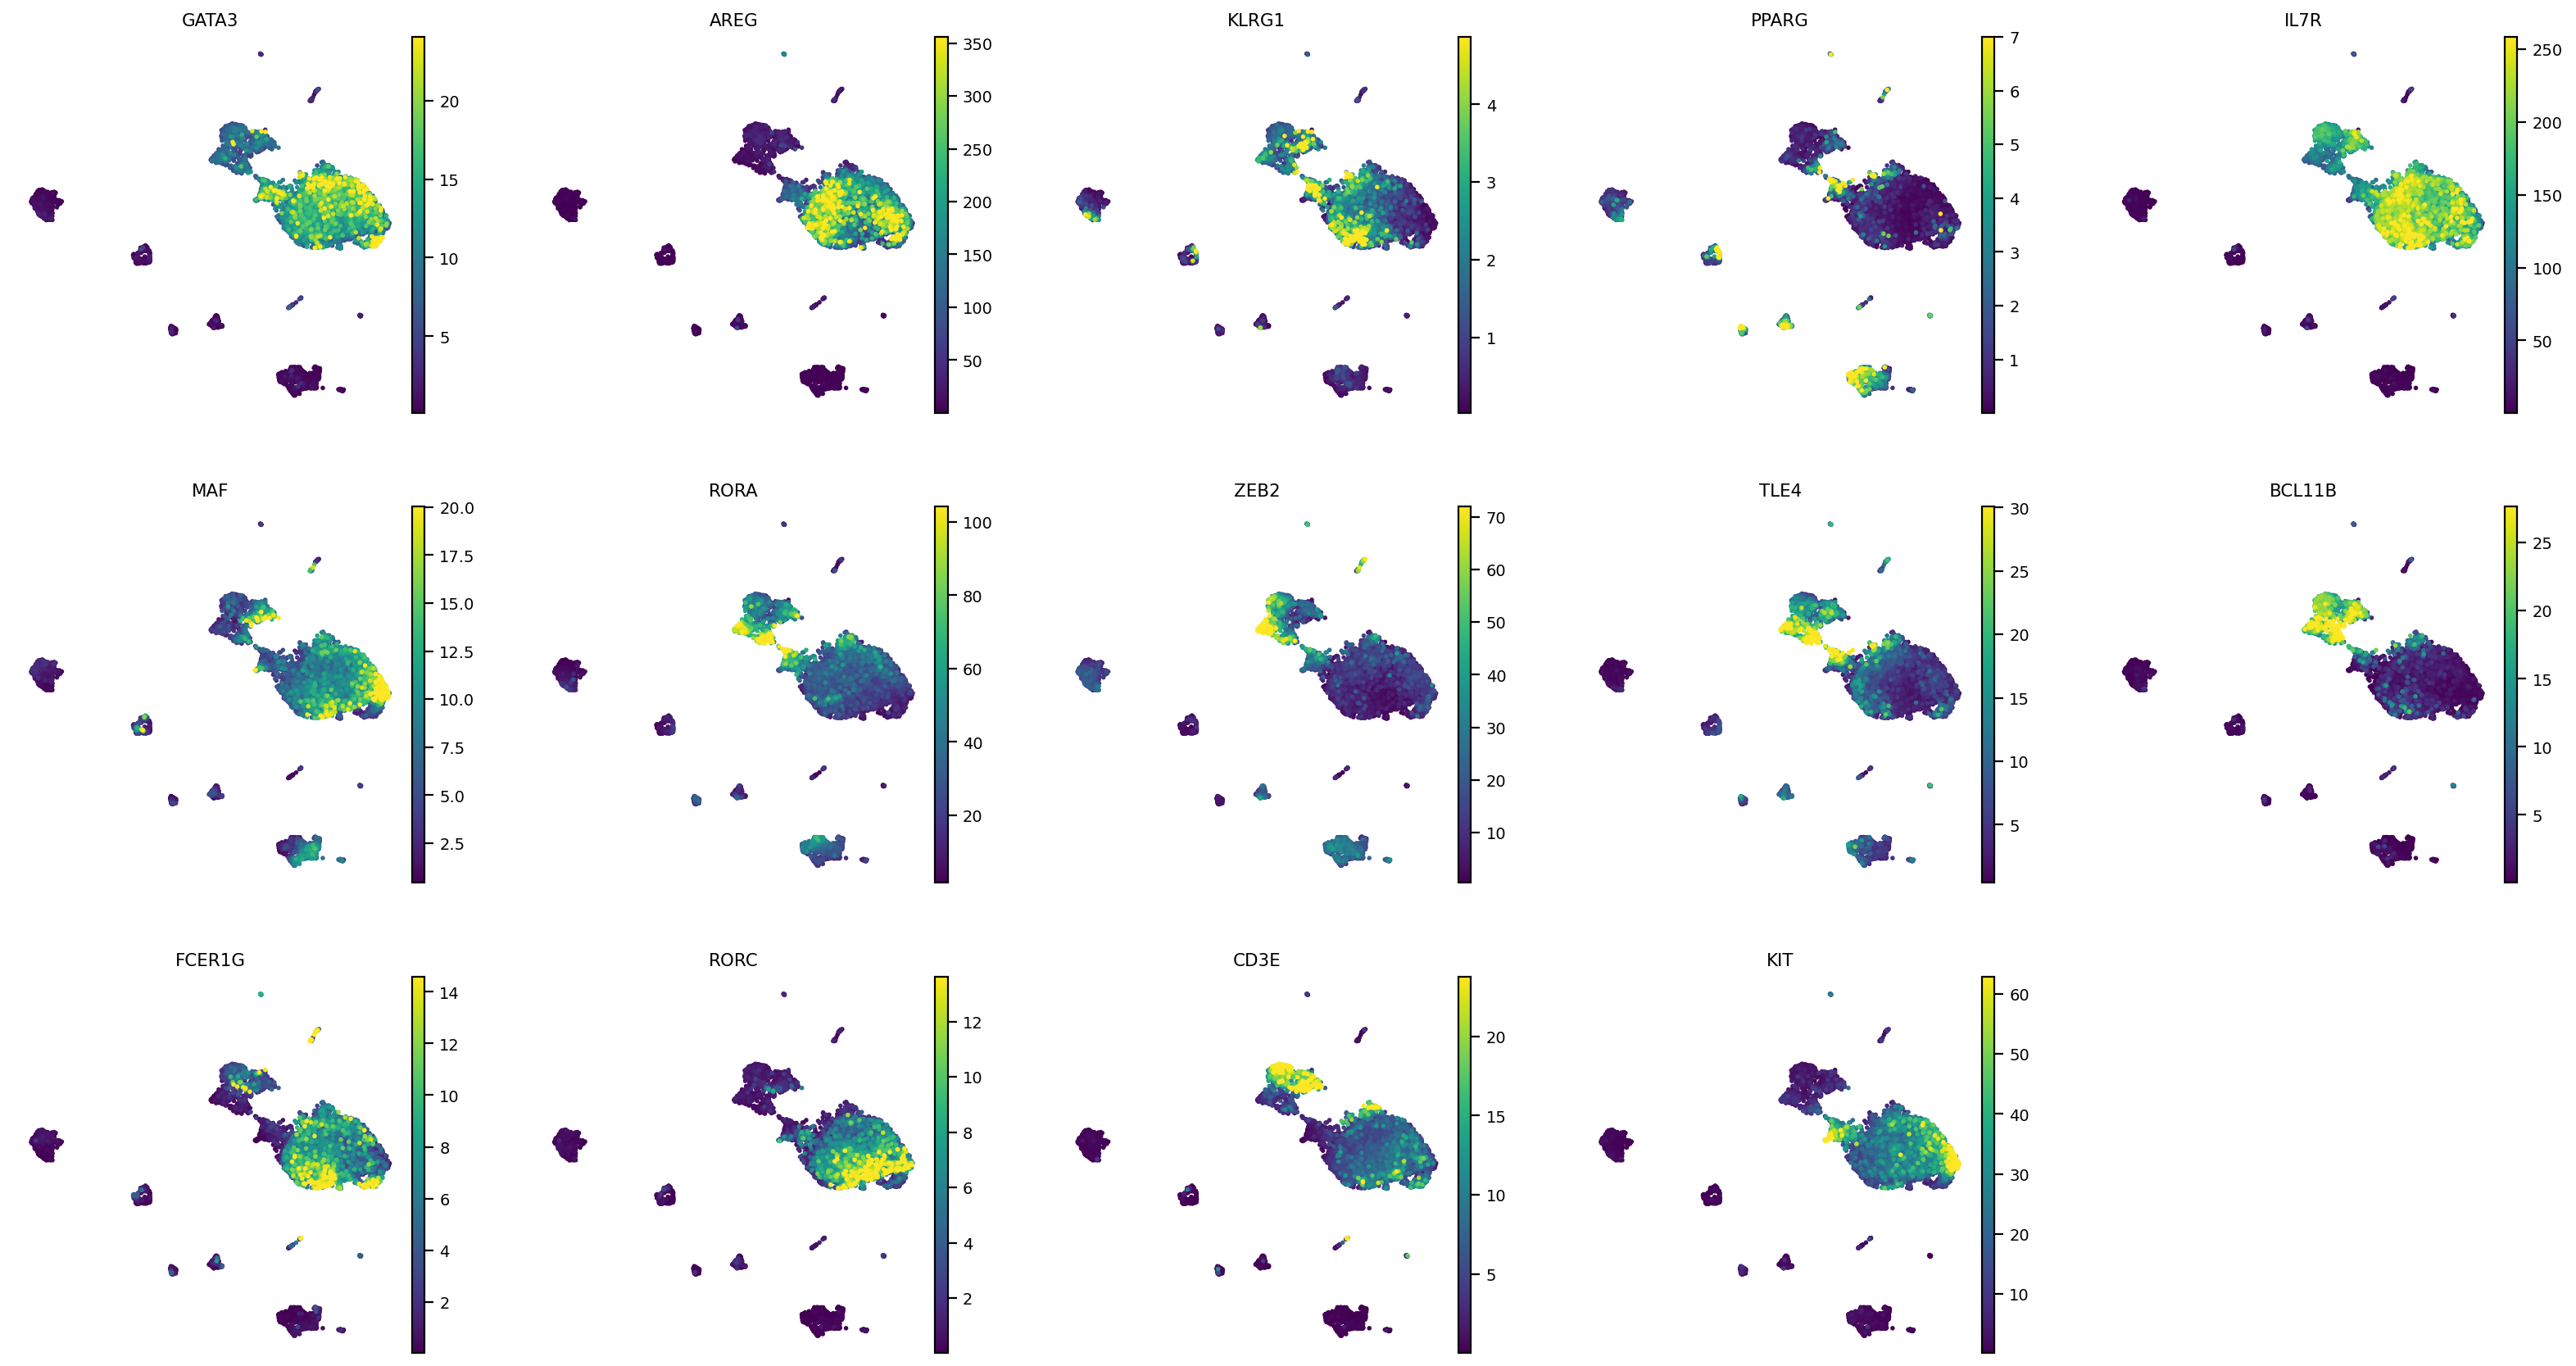

In [85]:
sc.settings.figdir = "../analysis"
rna.pl.gene_embedding(
    fullAdata,
    geneList,
    layer="scVI_normalized",
    s=25,
    save="_full_data_feature_plots.pdf",
    ncols=5
)

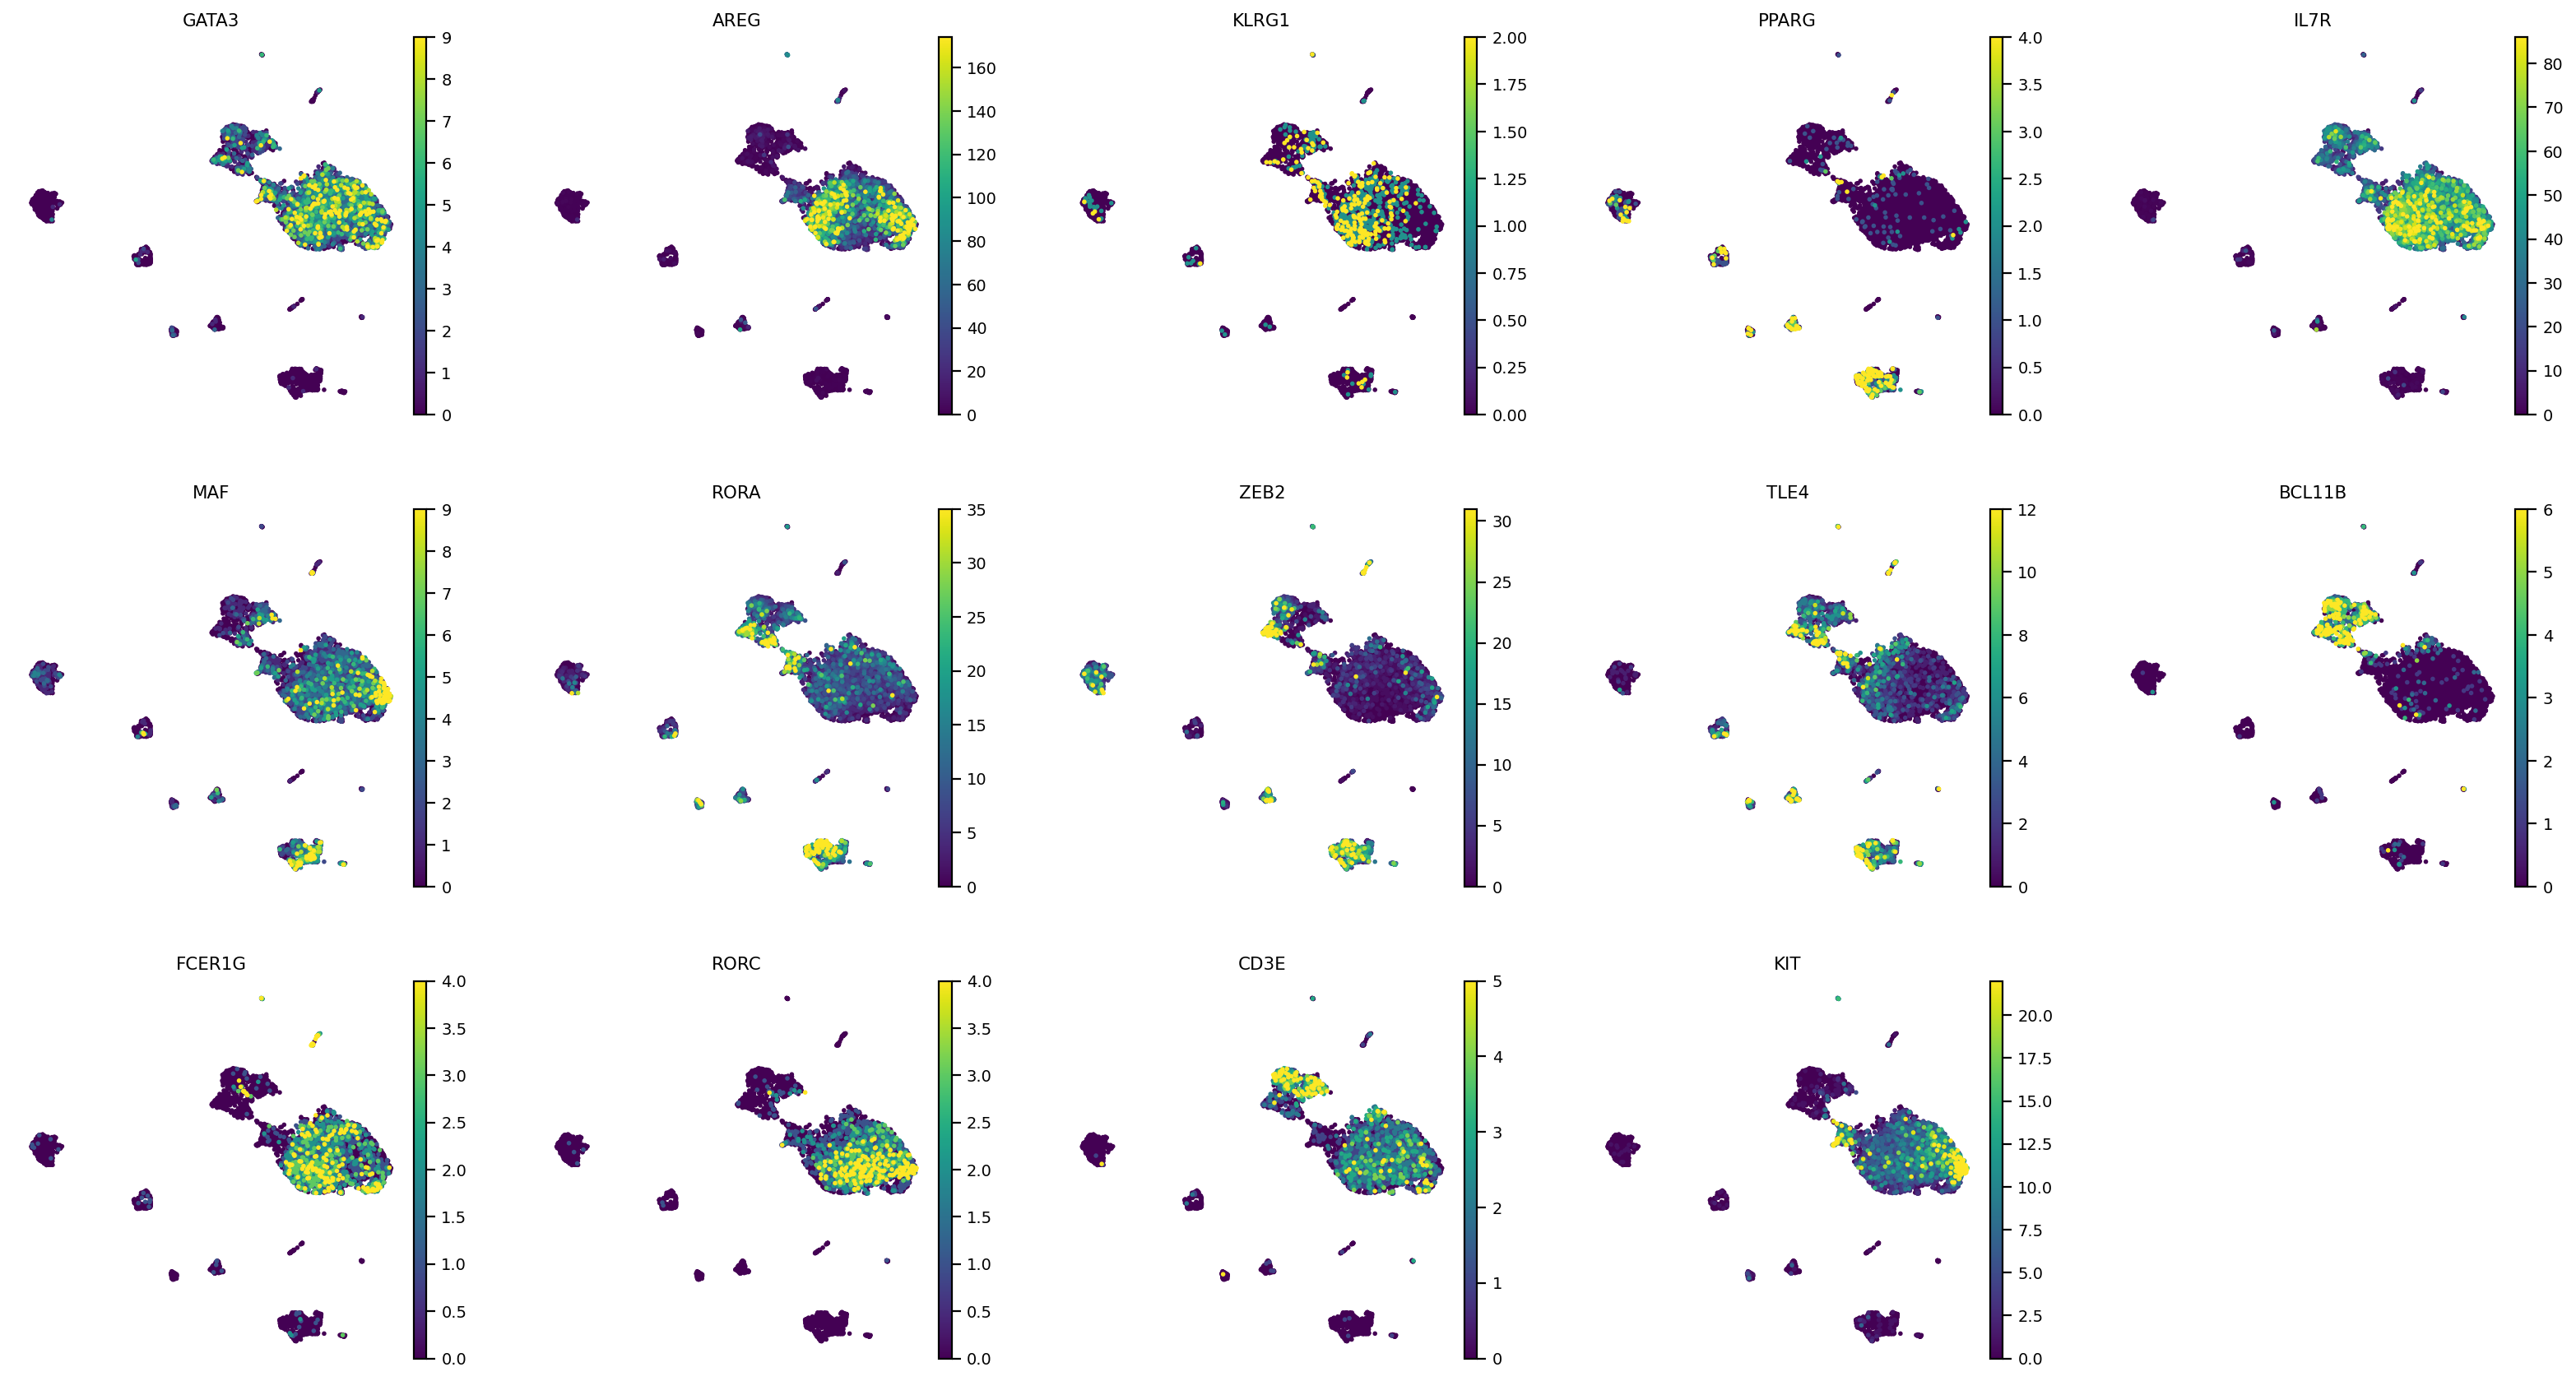

In [86]:
sc.settings.figdir = "../analysis"
rna.pl.gene_embedding(
    fullAdata,
    geneList,
    layer="raw_counts",
    s=25,
    ncols=5
)